In [13]:
import pandas as pd

df = pd.read_csv("../Student Placement Dataset/full_dataset.csv")

# All Feature Except Target
numeric_features = [
    'Age',
    'CGPA',
    'Internships',
    'Projects',
    'Coding_Skills',
    'Communication_Skills',
    'Aptitude_Test_Score',
    'Soft_Skills_Rating',
    'Certifications',
    'Backlogs'
]

categorical_features = [
    'Branch',
    'Degree',
    'Gender'
]

target_col = "Placement_Status"  # change if needed
X = df[numeric_features + categorical_features]


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Placement_Status"])

print("Classes in order:", le.classes_)
for i, cls in enumerate(le.classes_):
    print(f"{cls} --> {i}")


Classes in order: ['Not Placed' 'Placed']
Not Placed --> 0
Placed --> 1


In [14]:
# Train/Test Split (80/20) ------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class balance
)

In [15]:
# Preprocessing (Encoding + Scaling) ----------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [16]:
# Logistic Regression --------------------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred_lr = log_reg_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8666
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6375
           1       0.82      0.80      0.81      3625

    accuracy                           0.87     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.87      0.87      0.87     10000



In [17]:
# SVM Classifier -----------------------------------------------------------------------------------------
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9824
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6375
           1       0.98      0.97      0.98      3625

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Step-by-step: Logistic Regression Decision Boundary with PCA

In [18]:
# Transform your data (after preprocessing)
from sklearn.decomposition import PCA

# Use the SAME preprocessing as your model
X_train_processed = log_reg_pipeline.named_steps["preprocessor"].fit_transform(X_train)

# Reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)


In [19]:
# Train a classifier on PCA space
from sklearn.linear_model import LogisticRegression

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)


LogisticRegression(max_iter=1000)

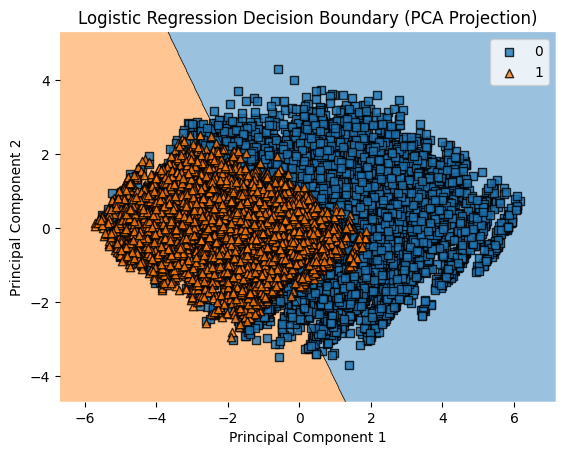

In [25]:
# Plot decision regions
from mlxtend.plotting.decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(
    X=X_train_pca,
    y=y_train.values if hasattr(y_train, "values") else y_train,
    clf=lr_pca
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right")
plt.title("Logistic Regression Decision Boundary (PCA Projection)")
plt.show()
